In [2]:
# TECH CHALLENGE - FASE 1
# Este notebook consiste no pipeline completo de análise e modelagem para o diagnóstico de câncer de mama, com base no dataset `data/data.csv`.
# O código foi modularizado para melhor organização, seguindo boas práticas de engenharia de dados e aprendizado de máquina:
# - data_preprosseing.py - carregamento, limpeza e padronização dos dados  
# - model_training.py - treinamento dos modelos (KNN e Árvore de Decisão)  
# - evaluation.py - avaliação do desempenho dos modelos  



In [3]:
import sys, os
sys.path.append(os.path.abspath('..'))  # garante acesso à pasta src

# Importa as funções dos módulos criados
from src.data_preprocessing import (carregar_dados, separar_features_target, dividir_dados, padronizar_dados, analisar_correlacao)
from src.model_training import (train_knn_model, train_decision_tree_model)
from src.evaluation import evaluate_model
from src.utils import (verificar_overfitting, testar_modelo)

# Bibliotecas úteis para análise e visualização
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Ambiente configurado com sucesso. Pronto para iniciar o pipeline!")


✅ Ambiente configurado com sucesso. Pronto para iniciar o pipeline!


In [4]:
# --- Carregar dataset ---
DATA_PATH = '../data/data.csv'  # caminho relativo à pasta notebooks/

try:
    df = carregar_dados(DATA_PATH)
    print('Dataset carregado com sucesso!')
    # Exibir a quatidade de linhas e colunas disponíveis no dataset
    print(f"Formato: {df.shape[0]} linhas e {df.shape[1]} colunas.")
    
    # Visualizar amostras iniciais e finais
    display(df.head())
    display(df.tail())
except FileNotFoundError:
    print(' Arquivo não encontrado. Verifique se o caminho DATA_PATH está correto.')

Dataset carregado com sucesso: 569 linhas e 31 colunas.
Dataset carregado com sucesso!
Formato: 569 linhas e 31 colunas.


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
# Exibir métricas importantes, como quantidade, média, desvio padrão etc, relativas às features disponíveis no dataset
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# Exibir as mesmas métricas anteriores, porém somente relativas à variável target do dataset, que seria o disgnóstico final
df.groupby('diagnosis').describe()

radius_mean                                                      \
                count       mean       std     min     25%     50%    75%   
diagnosis                                                                   
0               357.0  12.146524  1.780512   6.981  11.080  12.200  13.37   
1               212.0  17.462830  3.203971  10.950  15.075  17.325  19.59   

                 texture_mean             ... symmetry_worst          \
             max        count       mean  ...            75%     max   
diagnosis                                 ...                          
0          17.85        357.0  17.914762  ...       0.298300  0.4228   
1          28.11        212.0  21.604906  ...       0.359225  0.6638   

          fractal_dimension_worst                                         \
                            count      mean       std      min       25%   
diagnosis                                                                  
0                           357.0  0.079442  0.013804  0.05521  0.070090   
1                           212.0  0.091530  0.021553  0.05504  0.076302   

                                      
               50%       75%     max  
diagnosis                             
0          0.07712  0.085410  0.1486  
1          0.08760  0.102625  0.2075  

[2 rows x 240 columns]

In [7]:
#Exibir o tipo de dado de cada feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
# Soma a quantidade de valores nulos das features do dataset - base tratada na funçaõ de carregarDados
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# Exibe a quantidade casos Benignos e Malignos existentes no dataset.
print(df['diagnosis'].unique())
print(df['diagnosis'].value_counts())

[1 0]
diagnosis
0    357
1    212
Name: count, dtype: int64


Correlação das variáveis com o target 'diagnosis':


diagnosis               1.00
concave points_worst    0.79
concave points_mean     0.78
radius_worst            0.78
perimeter_worst         0.78
perimeter_mean          0.74
radius_mean             0.73
area_worst              0.73
area_mean               0.71
concavity_mean          0.70
concavity_worst         0.66
Name: diagnosis, dtype: float64

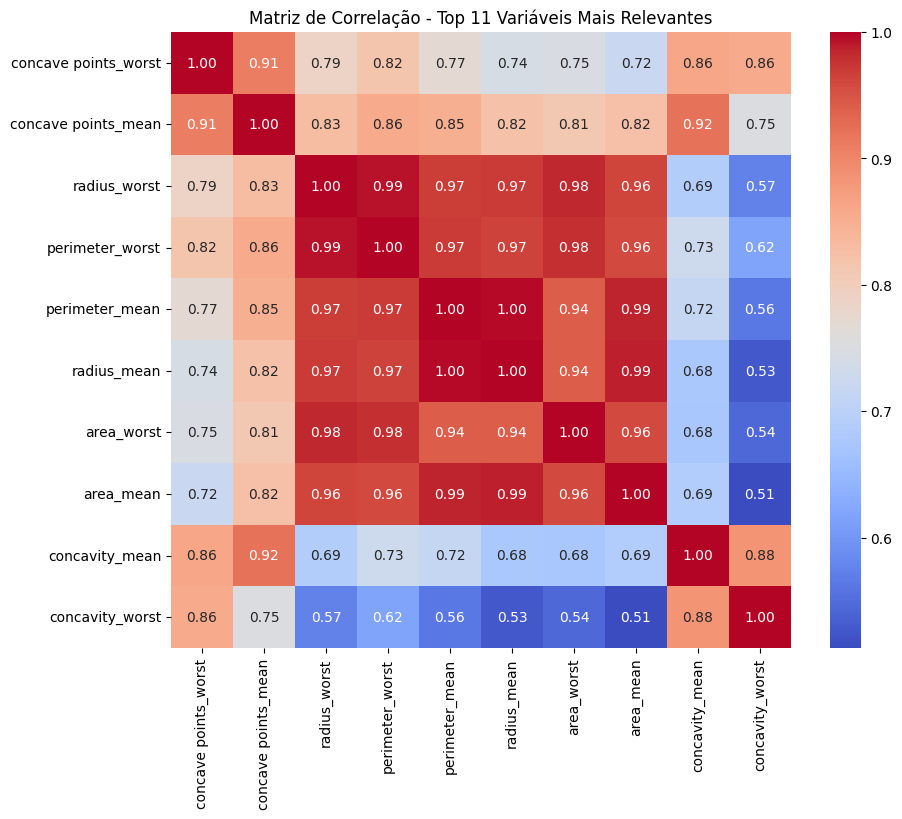

diagnosis                  1.00
concave points_worst       0.79
concave points_mean        0.78
radius_worst               0.78
perimeter_worst            0.78
perimeter_mean             0.74
radius_mean                0.73
area_worst                 0.73
area_mean                  0.71
concavity_mean             0.70
concavity_worst            0.66
compactness_mean           0.60
compactness_worst          0.59
radius_se                  0.57
perimeter_se               0.56
area_se                    0.55
texture_worst              0.46
symmetry_worst             0.42
smoothness_worst           0.42
texture_mean               0.42
concave points_se          0.41
smoothness_mean            0.36
symmetry_mean              0.33
fractal_dimension_worst    0.32
compactness_se             0.29
concavity_se               0.25
fractal_dimension_se       0.08
texture_se                -0.01
fractal_dimension_mean    -0.01
symmetry_se               -0.01
smoothness_se             -0.07
Name: di

In [27]:
# Gerar uma matriz de correlação que exibe as variáveis mais relacionadas à variável target do dataset com base na coloração e pontuação
# A matriz evidência como uma váriável se relaciona com outra do dataset, se aumentam proporcionalmente ou o oposto
# Em seguida, a disposição das features de forma decrescente com base no seu grau de correlação com a variável target (diagnosis)
analisar_correlacao(df, target='diagnosis', top_n=10)


In [28]:
# ANÁLISE DA MATRIZ DE CORRELAÇÃO - > 
# Com base em uma interpretação da matriz gerada, é possível identificar 5 variávéis com maiores pontuações e mais próximas de 1. 
# O que significa que elas podem ser utilizadas para o treinamento o predição do modelo, pois estão proporcionalmente correlacionadas com a variável targe.
# As features mais relevantes são: 
# 1. concave points_worst - Pontos côncavos -> mede a quantidade e profundidade das concavidades nas bordas do tumor, considerando o pior caso (maior valor observado). Tumores malignos tendem a ter bordas mais irregulares e com mais concavidades.
# 2. concave points_mean - Média de pontos côncavos -> Representa a média da quantidade de concavidades nas bordas do tumor. Valores maiores indicam maior irregularidade, característica comum em tumores malignos.
# 3. radius_worst - Raio -> É o maior raio médio do tumor, calcula a do centro até a borda do tumor.
# 4. perimeter_worst - Perimêtro -> Representa o maior perímetro detectado entre as medições do tumor, está relavcvionado à massa do tumor.
# 5. perimeter_mean - Perimêtro Médio -> É o valor médio do perímetro do tumor.
# A partir das informações descritas acima, é possível notar que as propriedades geométricas do tumor influenciam diretamente no dignóstico final.

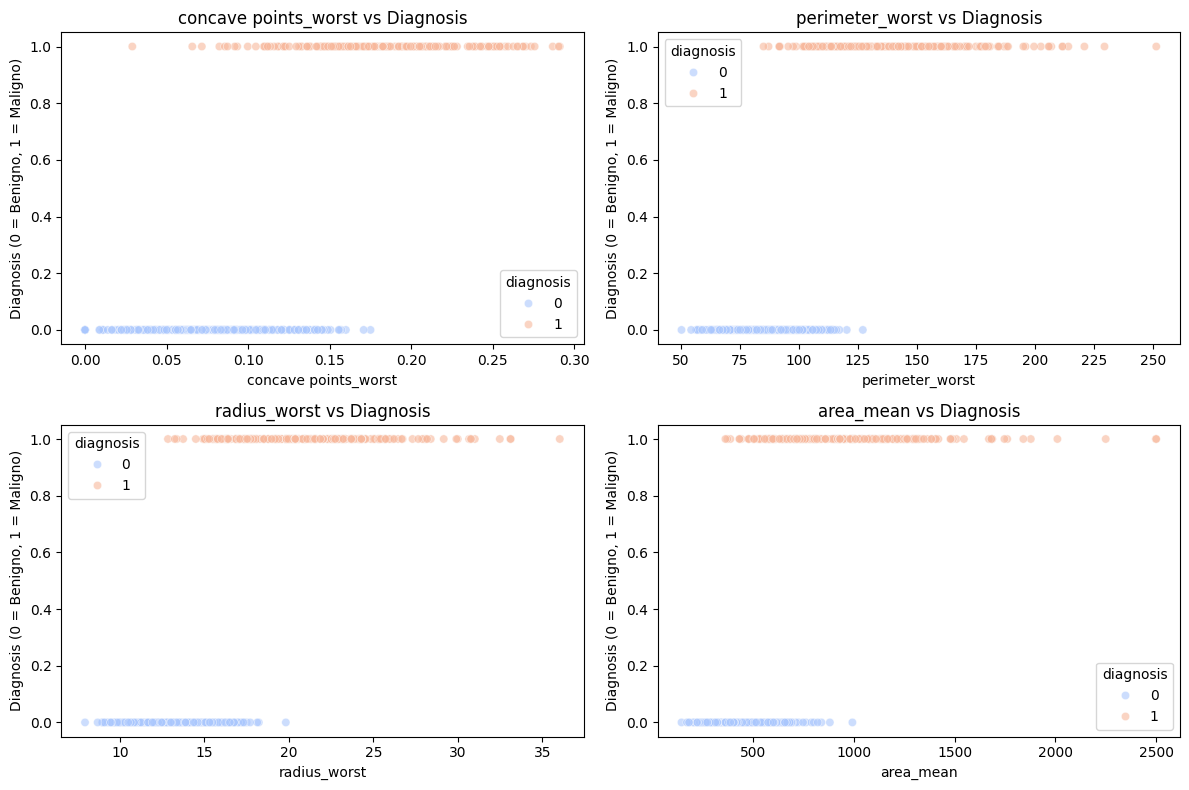

,count,mean,std,min,25%,50%,75%,max
concave points_worst,569.0,0.114606,0.065732,0.00,0.06493,0.09993,0.1614,0.291
perimeter_worst,569.0,107.261213,33.602542,50.41,84.11000,97.66000,125.4000,251.200
radius_worst,569.0,16.269190,4.833242,7.93,13.01000,14.97000,18.7900,36.040
area_mean,569.0,654.889104,351.914129,143.50,420.30000,551.10000,782.7000,2501.000


In [34]:
# Selecionar algumas variáveis mais correlacionadas com o diagnóstico
top_vars = ['concave points_worst', 'perimeter_worst', 'radius_worst', 'area_mean']


# Plotar gráficos de dispersão para cada variável relevante vs diagnosis 
plt.figure(figsize=(12, 8))
for i, var in enumerate(top_vars, 1):
    plt.subplot(2, 2, i)  
    sns.scatterplot(x=var, y='diagnosis', data=df, alpha=0.6, hue='diagnosis', palette='coolwarm')
    plt.title(f'{var} vs Diagnosis')
    plt.xlabel(var)
    plt.ylabel('Diagnosis (0 = Benigno, 1 = Maligno)')

plt.tight_layout()
plt.show()

# Exibir métricas importantes, como quantidade, média, desvio padrão etc, relativas às features mais relevantes utilizadas nos gráficos e assim compará-los.
df[top_vars].describe().T


In [35]:
# ANÁLISE DOS GRÁFICOS ->

A variável **radius_worst**, que representa o maior raio do tumor, apresenta média de **16.27**.  
Os casos **benignos** concentram-se majoritariamente **abaixo de 20**, enquanto os **malignos** ultrapassam esse valor.  

Essa tendência é visível no gráfico de dispersão, que mostra dois agrupamentos distintos.  
Portanto, **quanto maior o valor de `radius_worst`, maior a probabilidade de o tumor ser maligno**, evidenciando que o tamanho do tumor é um importante indicador diagnóstico.

SyntaxError: invalid syntax (3654194690.py, line 3)

<Axes: xlabel='diagnosis', ylabel='concave points_worst'>

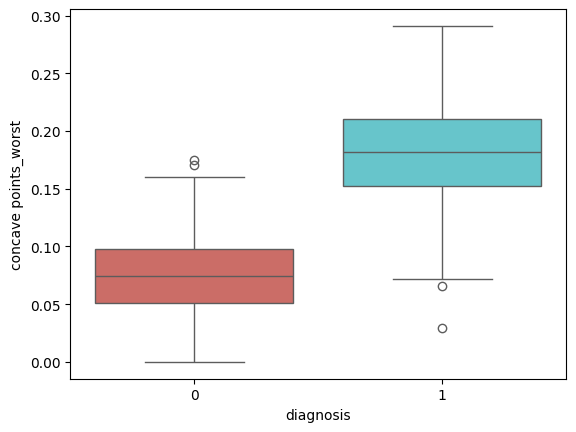

In [12]:
import seaborn as sb
# Plotar gráficos que exibem alguns outliers do dataset, tanto de casos benignos quanto de casos malignos com base na feature de grande correlação: concave points_worst
sb.boxplot(x='diagnosis', y='concave points_worst', data=df, hue='diagnosis', palette='hls', legend=False)

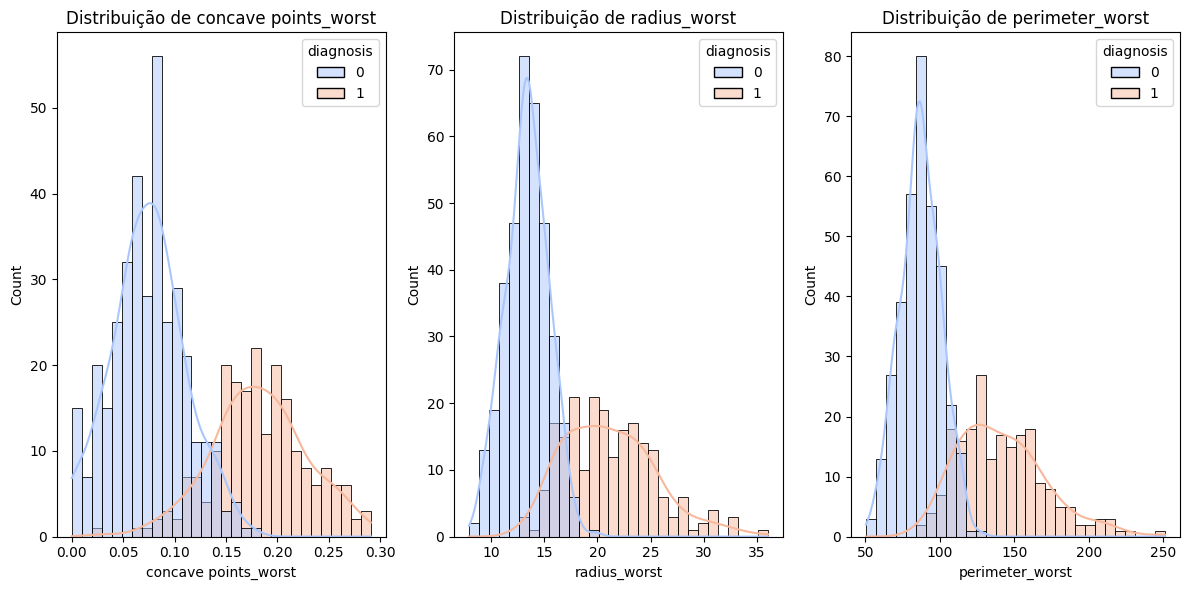

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

top_features = ['concave points_worst', 'radius_worst', 'perimeter_worst']

plt.figure(figsize=(12, 6))
for i, feature in enumerate(top_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, palette='coolwarm', bins=30)
    plt.title(f'Distribuição de {feature}')
plt.tight_layout()
plt.show()


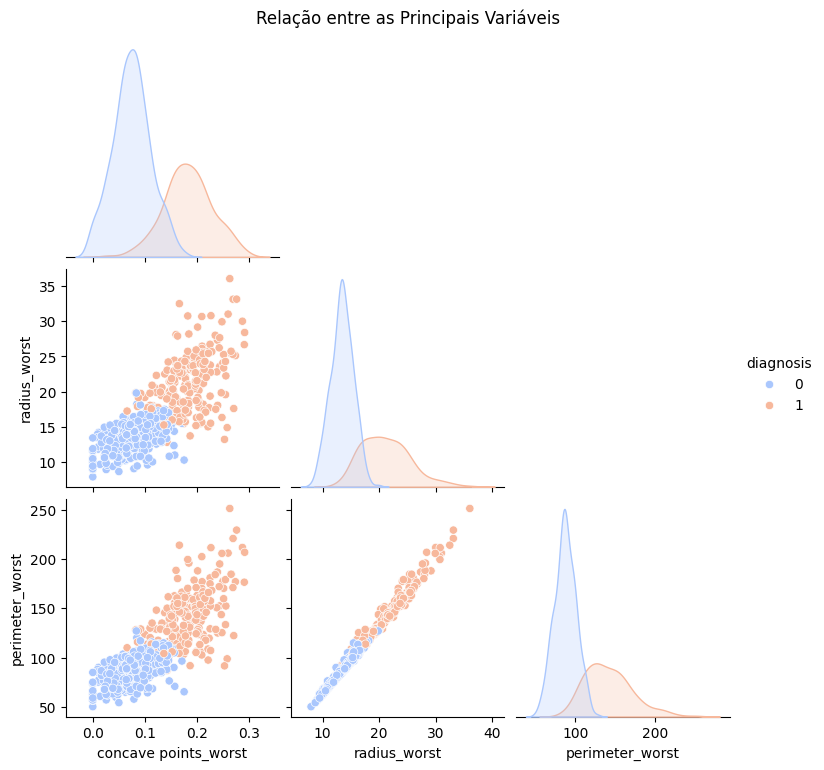

In [23]:
sns.pairplot(df, vars=top_features, hue='diagnosis', palette='coolwarm', corner=True)
plt.suptitle('Relação entre as Principais Variáveis', y=1.02)
plt.show()

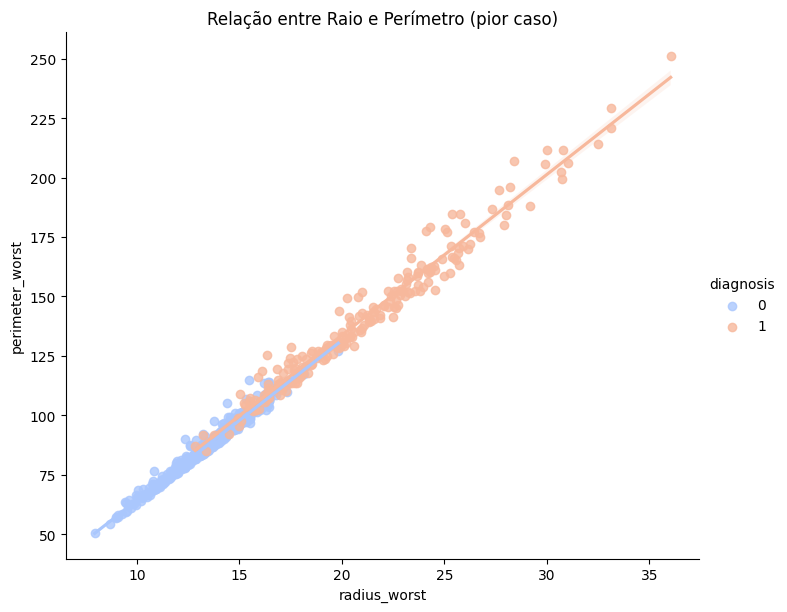

In [24]:
sns.lmplot(x='radius_worst', y='perimeter_worst', hue='diagnosis', data=df, palette='coolwarm', height=6, aspect=1.2)
plt.title('Relação entre Raio e Perímetro (pior caso)')
plt.show()

KNN treinado com sucesso.

 Avaliação do KNN
----------------------------------------
Accuracy: 0.9561
Recall:   0.9048
F1-score: 0.9383

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



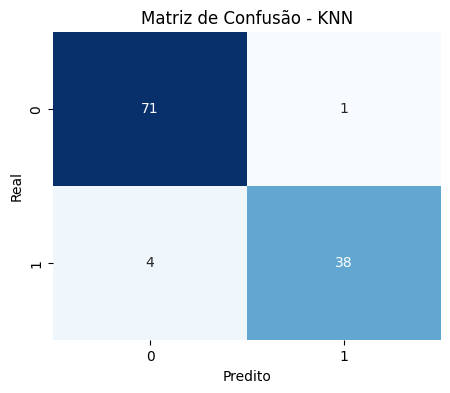

In [13]:
# Separar features e target
X, y = separar_features_target(df)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = dividir_dados(X, y)

# Padronizar os dados
X_train_scaled, X_test_scaled, scaler = padronizar_dados(X_train, X_test)

# Treinar o modelo KNN
knn = train_knn_model(X_train_scaled, y_train, n_neighbors=5)

# Avaliar o modelo
evaluate_model(knn, X_test_scaled, y_test, model_name="KNN")

In [14]:
# Verificar possível overfitting
verificar_overfitting(knn, X_train_scaled, y_train, X_test_scaled, y_test, model_name="KNN")


Verificação de Overfitting - KNN
---------------------------------------------
Acurácia no treino: 0.9780
Acurácia no teste:  0.9561
Modelo apresenta bom equilíbrio entre treino e teste.


In [15]:
# Verificar a quantidade de valores malignos utilizados no treino
list(y_train).count(1)

170

In [16]:
# Verificar a quantidade de valores malignos utilizados no treino
list(y_train).count(0)

285

In [17]:
print(X.shape)
print(X.columns)

(569, 30)
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [18]:
caso_maligno = {
    'radius_mean': 20.1,
    'texture_mean': 23.5,
    'perimeter_mean': 132.5,
    'area_mean': 1300.0,
    'smoothness_mean': 0.095,
    'compactness_mean': 0.160,
    'concavity_mean': 0.240,
    'concave points_mean': 0.125,
    'symmetry_mean': 0.180,
    'fractal_dimension_mean': 0.060,
    'radius_se': 1.30,
    'texture_se': 1.00,
    'perimeter_se': 8.0,
    'area_se': 50.0,
    'smoothness_se': 0.006,
    'compactness_se': 0.025,
    'concavity_se': 0.035,
    'concave points_se': 0.012,
    'symmetry_se': 0.020,
    'fractal_dimension_se': 0.003,
    'radius_worst': 24.0,
    'texture_worst': 29.5,
    'perimeter_worst': 160.0,
    'area_worst': 1800.0,
    'smoothness_worst': 0.120,
    'compactness_worst': 0.275,
    'concavity_worst': 0.310,
    'concave points_worst': 0.180,
    'symmetry_worst': 0.260,
    'fractal_dimension_worst': 0.085
}

caso_benigno = {
    'radius_mean': 11.5,
    'texture_mean': 14.8,
    'perimeter_mean': 75.0,
    'area_mean': 410.0,
    'smoothness_mean': 0.090,
    'compactness_mean': 0.070,
    'concavity_mean': 0.045,
    'concave points_mean': 0.020,
    'symmetry_mean': 0.170,
    'fractal_dimension_mean': 0.065,
    'radius_se': 0.30,
    'texture_se': 0.60,
    'perimeter_se': 2.0,
    'area_se': 15.0,
    'smoothness_se': 0.003,
    'compactness_se': 0.008,
    'concavity_se': 0.007,
    'concave points_se': 0.002,
    'symmetry_se': 0.008,
    'fractal_dimension_se': 0.001,
    'radius_worst': 13.0,
    'texture_worst': 17.0,
    'perimeter_worst': 85.0,
    'area_worst': 520.0,
    'smoothness_worst': 0.110,
    'compactness_worst': 0.100,
    'concavity_worst': 0.080,
    'concave points_worst': 0.040,
    'symmetry_worst': 0.200,
    'fractal_dimension_worst': 0.070
}

caso_maligno_extremo = {
    'radius_mean': 30.5, 
    'texture_mean': 35.0, 
    'perimeter_mean': 210.0, 
    'area_mean': 2500.0,
    'smoothness_mean': 0.160, 
    'compactness_mean': 0.350,
    'concavity_mean': 0.450, 
    'concave points_mean': 0.200,
    'symmetry_mean': 0.300, 
    'fractal_dimension_mean': 0.100,
    'radius_se': 3.0, 
    'texture_se': 2.5, 
    'perimeter_se': 15.0, 
    'area_se': 120.0,
    'smoothness_se': 0.010, 
    'compactness_se': 0.050, 
    'concavity_se': 0.060, 
    'concave points_se': 0.020,
    'symmetry_se': 0.030, 
    'fractal_dimension_se': 0.005,
    'radius_worst': 35.0, 
    'texture_worst': 40.0, 
    'perimeter_worst': 250.0, 
    'area_worst': 3500.0,
    'smoothness_worst': 0.200, 
    'compactness_worst': 0.400, 
    'concavity_worst': 0.500,
    'concave points_worst': 0.300, 
    'symmetry_worst': 0.350, 
    'fractal_dimension_worst': 0.120
}

caso_benigno_variado = {
    'radius_mean': 12.0, 
    'texture_mean': 15.0,
    'perimeter_mean': 78.0, 
    'area_mean': 450.0,
    'smoothness_mean': 0.085,
    'compactness_mean': 0.060, 
    'concavity_mean': 0.030, 
    'concave points_mean': 0.015,
    'symmetry_mean': 0.160, 
    'fractal_dimension_mean': 0.055,
    'radius_se': 0.35, 
    'texture_se': 0.50, 
    'perimeter_se': 2.5, 
    'area_se': 12.0,
    'smoothness_se': 0.002,
    'compactness_se': 0.005,
    'concavity_se': 0.004, 
    'concave points_se': 0.001,
    'symmetry_se': 0.007, 
    'fractal_dimension_se': 0.001,
    'radius_worst': 13.5, 
    'texture_worst': 18.0, 
    'perimeter_worst': 88.0, 
    'area_worst': 550.0,
    'smoothness_worst': 0.105, 
    'compactness_worst': 0.090,
    'concavity_worst': 0.070,
    'concave points_worst': 0.035,
    'symmetry_worst': 0.180, 
    'fractal_dimension_worst': 0.065
}


casos = [caso_benigno, caso_maligno, caso_benigno_variado, caso_maligno_extremo]
nomes = ['Benigno 1', 'Maligno 1', 'Benigno 2', 'Maligno Extremo']

testar_modelo(knn, scaler, casos, nomes)


🔎 Resultados das previsões:



,Previsão,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,BENIGNO (0),11.5,14.8,75.0,410.0,0.090,0.07,0.045,0.020,0.17,...,13.0,17.0,85.0,520.0,0.110,0.100,0.08,0.040,0.20,0.070
1,MALIGNO (1),20.1,23.5,132.5,1300.0,0.095,0.16,0.240,0.125,0.18,...,24.0,29.5,160.0,1800.0,0.120,0.275,0.31,0.180,0.26,0.085
2,BENIGNO (0),12.0,15.0,78.0,450.0,0.085,0.06,0.030,0.015,0.16,...,13.5,18.0,88.0,550.0,0.105,0.090,0.07,0.035,0.18,0.065
3,MALIGNO (1),30.5,35.0,210.0,2500.0,0.160,0.35,0.450,0.200,0.30,...,35.0,40.0,250.0,3500.0,0.200,0.400,0.50,0.300,0.35,0.120


,Paciente,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Previsão
0,Benigno 1,11.5,14.8,75.0,410.0,0.090,0.07,0.045,0.020,0.17,...,17.0,85.0,520.0,0.110,0.100,0.08,0.040,0.20,0.070,BENIGNO (0)
1,Maligno 1,20.1,23.5,132.5,1300.0,0.095,0.16,0.240,0.125,0.18,...,29.5,160.0,1800.0,0.120,0.275,0.31,0.180,0.26,0.085,MALIGNO (1)
2,Benigno 2,12.0,15.0,78.0,450.0,0.085,0.06,0.030,0.015,0.16,...,18.0,88.0,550.0,0.105,0.090,0.07,0.035,0.18,0.065,BENIGNO (0)
3,Maligno Extremo,30.5,35.0,210.0,2500.0,0.160,0.35,0.450,0.200,0.30,...,40.0,250.0,3500.0,0.200,0.400,0.50,0.300,0.35,0.120,MALIGNO (1)


Árvore de Decisão treinada com sucesso.

 Avaliação do DECISION TREE
----------------------------------------
Accuracy: 0.9211
Recall:   0.8333
F1-score: 0.8861

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        72
           1       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



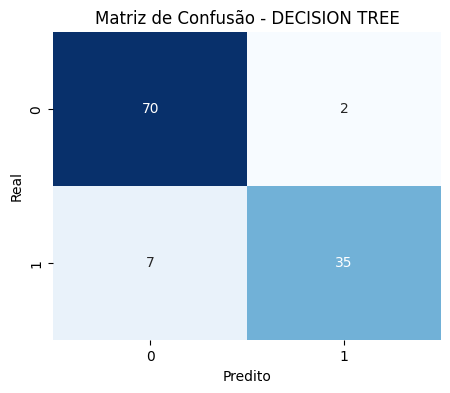

In [19]:
# Separar features e target
X, y = separar_features_target(df)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = dividir_dados(X, y)

# Padronizar os dados
X_train_scaled, X_test_scaled, scaler = padronizar_dados(X_train, X_test)

# Treinar o modelo KNN
tree_model = train_decision_tree_model(X_train_scaled, y_train, max_depth=5, random_state=42)

# Avaliar o modelo
evaluate_model(tree_model, X_test_scaled, y_test, model_name="DECISION TREE")


In [20]:
# Verificar possível overfitting
verificar_overfitting(tree_model, X_train_scaled, y_train, X_test_scaled, y_test, model_name="DECISION TREE")


Verificação de Overfitting - DECISION TREE
---------------------------------------------
Acurácia no treino: 0.9868
Acurácia no teste:  0.9211
Diferença significativa detectada — possível overfitting.


In [21]:
import pandas as pd

caso_ben = {
    'radius_mean': 14.5,
    'texture_mean': 20.2,
    'perimeter_mean': 95.0,
    'area_mean': 600.0,
    'smoothness_mean': 0.102,
    'compactness_mean': 0.14,
    'concavity_mean': 0.18,
    'concave points_mean': 0.09,
    'symmetry_mean': 0.18,
    'fractal_dimension_mean': 0.06,
    'radius_se': 0.25,
    'texture_se': 1.1,
    'perimeter_se': 2.5,
    'area_se': 20.0,
    'smoothness_se': 0.005,
    'compactness_se': 0.04,
    'concavity_se': 0.04,
    'concave points_se': 0.02,
    'symmetry_se': 0.02,
    'fractal_dimension_se': 0.005,
    'radius_worst': 15.0,
    'texture_worst': 25.0,
    'perimeter_worst': 100.0,
    'area_worst': 700.0,
    'smoothness_worst': 0.12,
    'compactness_worst': 0.25,
    'concavity_worst': 0.30,
    'concave points_worst': 0.15,
    'symmetry_worst': 0.20,
    'fractal_dimension_worst': 0.08
}

caso_mal = {
    'radius_mean': 20.5,
    'texture_mean': 22.4,
    'perimeter_mean': 135.0,
    'area_mean': 1320.0,
    'smoothness_mean': 0.103,
    'compactness_mean': 0.180,
    'concavity_mean': 0.250,
    'concave points_mean': 0.135,
    'symmetry_mean': 0.190,
    'fractal_dimension_mean': 0.060,
    'radius_se': 1.10,
    'texture_se': 0.90,
    'perimeter_se': 8.50,
    'area_se': 50.0,
    'smoothness_se': 0.006,
    'compactness_se': 0.025,
    'concavity_se': 0.035,
    'concave points_se': 0.012,
    'symmetry_se': 0.020,
    'fractal_dimension_se': 0.003,
    'radius_worst': 24.5,
    'texture_worst': 29.5,
    'perimeter_worst': 162.0,
    'area_worst': 1850.0,
    'smoothness_worst': 0.120,
    'compactness_worst': 0.280,
    'concavity_worst': 0.320,
    'concave points_worst': 0.185,
    'symmetry_worst': 0.265,
    'fractal_dimension_worst': 0.085
}

caso_maligno_extremo = {
    'radius_mean': 30.5, 
    'texture_mean': 35.0, 
    'perimeter_mean': 210.0, 
    'area_mean': 2500.0,
    'smoothness_mean': 0.160, 
    'compactness_mean': 0.350,
    'concavity_mean': 0.450, 
    'concave points_mean': 0.200,
    'symmetry_mean': 0.300, 
    'fractal_dimension_mean': 0.100,
    'radius_se': 3.0, 
    'texture_se': 2.5, 
    'perimeter_se': 15.0, 
    'area_se': 120.0,
    'smoothness_se': 0.010, 
    'compactness_se': 0.050, 
    'concavity_se': 0.060, 
    'concave points_se': 0.020,
    'symmetry_se': 0.030, 
    'fractal_dimension_se': 0.005,
    'radius_worst': 35.0, 
    'texture_worst': 40.0, 
    'perimeter_worst': 250.0, 
    'area_worst': 3500.0,
    'smoothness_worst': 0.200, 
    'compactness_worst': 0.400, 
    'concavity_worst': 0.500,
    'concave points_worst': 0.300, 
    'symmetry_worst': 0.350, 
    'fractal_dimension_worst': 0.120
}

caso_benigno_variado = {
    'radius_mean': 12.0, 
    'texture_mean': 15.0,
    'perimeter_mean': 78.0, 
    'area_mean': 450.0,
    'smoothness_mean': 0.085,
    'compactness_mean': 0.060, 
    'concavity_mean': 0.030, 
    'concave points_mean': 0.015,
    'symmetry_mean': 0.160, 
    'fractal_dimension_mean': 0.055,
    'radius_se': 0.35, 
    'texture_se': 0.50, 
    'perimeter_se': 2.5, 
    'area_se': 12.0,
    'smoothness_se': 0.002,
    'compactness_se': 0.005,
    'concavity_se': 0.004, 
    'concave points_se': 0.001,
    'symmetry_se': 0.007, 
    'fractal_dimension_se': 0.001,
    'radius_worst': 13.5, 
    'texture_worst': 18.0, 
    'perimeter_worst': 88.0, 
    'area_worst': 550.0,
    'smoothness_worst': 0.105, 
    'compactness_worst': 0.090,
    'concavity_worst': 0.070,
    'concave points_worst': 0.035,
    'symmetry_worst': 0.180, 
    'fractal_dimension_worst': 0.065
}


casos = [caso_mal, caso_ben, caso_benigno_variado, caso_maligno_extremo]
nomes = ['Benigno 1', 'Maligno 1', 'Benigno 2', 'Maligno Extremo']

testar_modelo(knn, scaler, casos, nomes)


🔎 Resultados das previsões:



,Previsão,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,MALIGNO (1),20.5,22.4,135.0,1320.0,0.103,0.18,0.25,0.135,0.19,...,24.5,29.5,162.0,1850.0,0.120,0.28,0.32,0.185,0.265,0.085
1,BENIGNO (0),14.5,20.2,95.0,600.0,0.102,0.14,0.18,0.090,0.18,...,15.0,25.0,100.0,700.0,0.120,0.25,0.30,0.150,0.200,0.080
2,BENIGNO (0),12.0,15.0,78.0,450.0,0.085,0.06,0.03,0.015,0.16,...,13.5,18.0,88.0,550.0,0.105,0.09,0.07,0.035,0.180,0.065
3,MALIGNO (1),30.5,35.0,210.0,2500.0,0.160,0.35,0.45,0.200,0.30,...,35.0,40.0,250.0,3500.0,0.200,0.40,0.50,0.300,0.350,0.120


,Paciente,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Previsão
0,Benigno 1,20.5,22.4,135.0,1320.0,0.103,0.18,0.25,0.135,0.19,...,29.5,162.0,1850.0,0.120,0.28,0.32,0.185,0.265,0.085,MALIGNO (1)
1,Maligno 1,14.5,20.2,95.0,600.0,0.102,0.14,0.18,0.090,0.18,...,25.0,100.0,700.0,0.120,0.25,0.30,0.150,0.200,0.080,BENIGNO (0)
2,Benigno 2,12.0,15.0,78.0,450.0,0.085,0.06,0.03,0.015,0.16,...,18.0,88.0,550.0,0.105,0.09,0.07,0.035,0.180,0.065,BENIGNO (0)
3,Maligno Extremo,30.5,35.0,210.0,2500.0,0.160,0.35,0.45,0.200,0.30,...,40.0,250.0,3500.0,0.200,0.40,0.50,0.300,0.350,0.120,MALIGNO (1)
